<a href="https://colab.research.google.com/github/Sievv/AMPs-Against-EC-/blob/main/EC_imbalance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

# Mount entire Google Drive (default)
drive.mount('/content/drive')

Mounted at /content/drive


Load data

                                           Sequence  Activity
0            RQRYGKREVPAALFSKLLFTDDSENLPFRSRPEGVDQW         0
1                                     KIAKRIWKILRRR         1
2  VIFAIMARFYTYINPAEIEAQFDEDEKKNRLEKSNPYFMSGANSQKQM         0
3                                  GKVWDWIKSTAKKLWN         1
4                                GNNRPGYIPPPRPPHPRL         1

Class distribution:
 Activity
0    373
1    104
Name: count, dtype: int64


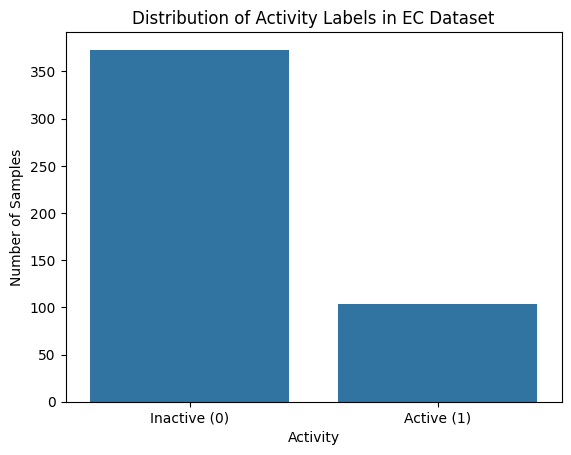

In [57]:
import pandas as pd
# Import necessary libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns


# Load datasets
df_active = pd.read_csv('/content/drive/MyDrive/EC/EC imbalance/EC 104.csv')
# Corrected file path for inactive dataset - removed duplicate 'MyDrive'
df_inactive = pd.read_csv('/content/drive/MyDrive/EC/EC imbalance/Inactive 373.csv')

# Strip whitespace from column names
df_active.columns = df_active.columns.str.strip()
df_inactive.columns = df_inactive.columns.str.strip()

# Add activity labels
df_active['Activity'] = 1
df_inactive['Activity'] = 0

# Select only 'Sequence' and 'Activity' columns
df_active = df_active[['Sequence', 'Activity']]
df_inactive = df_inactive[['Sequence', 'Activity']]

# Combine datasets
df_combined = pd.concat([df_active, df_inactive], ignore_index=True)

# Shuffle combined dataset
df_combined = df_combined.sample(frac=1, random_state=42).reset_index(drop=True)

# Save combined dataset
df_combined.to_csv('/content/drive/MyDrive/EC/EC imbalance/EC_combined.csv', index=False)

# Print first rows and class distribution
print(df_combined.head())
print("\nClass distribution:\n", df_combined['Activity'].value_counts())

# Count number of active and inactive samples
# Corrected df_ec to df_combined to use the combined dataframe
counts = df_combined['Activity'].value_counts().sort_index()

# Create a simple bar plot
sns.barplot(x=counts.index, y=counts.values)

# Add labels and title
plt.xticks([0, 1], ['Inactive (0)', 'Active (1)'])
plt.ylabel('Number of Samples')
plt.title('Distribution of Activity Labels in EC Dataset')

# Show plot
plt.show()

# Show plot
plt.show()

                                           Sequence  Activity
0            RQRYGKREVPAALFSKLLFTDDSENLPFRSRPEGVDQW         0
1                                     KIAKRIWKILRRR         1
2  VIFAIMARFYTYINPAEIEAQFDEDEKKNRLEKSNPYFMSGANSQKQM         0
3                                  GKVWDWIKSTAKKLWN         1
4                                GNNRPGYIPPPRPPHPRL         1

Class distribution:
 Activity
0    373
1    104
Name: count, dtype: int64


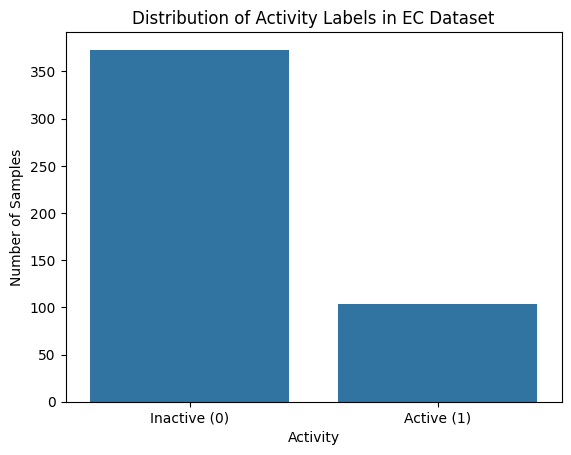

In [58]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
df_active = pd.read_csv('/content/drive/MyDrive/EC/EC imbalance/EC 104.csv')
df_inactive = pd.read_csv('/content/drive/MyDrive/EC/EC imbalance/Inactive 373.csv')

# Strip whitespace from column names
df_active.columns = df_active.columns.str.strip()
df_inactive.columns = df_inactive.columns.str.strip()

# Add activity labels
df_active['Activity'] = 1
df_inactive['Activity'] = 0

# Select only 'Sequence' and 'Activity' columns
df_active = df_active[['Sequence', 'Activity']]
df_inactive = df_inactive[['Sequence', 'Activity']]

# Combine datasets
df_combined = pd.concat([df_active, df_inactive], ignore_index=True)

# Shuffle combined dataset
df_combined = df_combined.sample(frac=1, random_state=42).reset_index(drop=True)

# Save combined dataset
df_combined.to_csv('/content/drive/MyDrive/EC/EC imbalance/EC_combined.csv', index=False)

# Print first rows and class distribution
print(df_combined.head())
print("\nClass distribution:\n", df_combined['Activity'].value_counts())

# Count number of active and inactive samples
# Correcting df_kp to df_combined
counts = df_combined['Activity'].value_counts().sort_index()

# Create a simple bar plot
sns.barplot(x=counts.index, y=counts.values)

# Add labels and title
plt.xticks([0, 1], ['Inactive (0)', 'Active (1)'])
plt.ylabel('Number of Samples')
plt.title('Distribution of Activity Labels in EC Dataset')

# Show plot
plt.show()

In [59]:
# Split into 80% train and 20% test
from sklearn.model_selection import train_test_split

# Use df_combined instead of df_shuffled for splitting
train_df, test_df = train_test_split(df_combined, test_size=0.2, stratify=df_combined['Activity'], random_state=42)

# Check sizes
print(f"Training set size: {len(train_df)}")
print(f"Test set size: {len(test_df)}")

# Optional: check label distribution
print("Train label distribution:")
print(train_df['Activity'].value_counts(normalize=True))
print("Test label distribution:")
print(test_df['Activity'].value_counts(normalize=True))

Training set size: 381
Test set size: 96
Train label distribution:
Activity
0    0.782152
1    0.217848
Name: proportion, dtype: float64
Test label distribution:
Activity
0    0.78125
1    0.21875
Name: proportion, dtype: float64


In [5]:
# Split into 80% train and 20% test
from sklearn.model_selection import train_test_split

# Split the combined DataFrame into train and test sets with stratification
train_df, test_df = train_test_split(df_combined, test_size=0.2, stratify=df_combined['Activity'], random_state=42)

# Check sizes
print(f"Training set size: {len(train_df)}")
print(f"Test set size: {len(test_df)}")

# Check label distribution in train and test sets
print("Train label distribution:")
print(train_df['Activity'].value_counts(normalize=True))
print("Test label distribution:")
print(test_df['Activity'].value_counts(normalize=True))

# Separate features and target for train and test
X_train = train_df.drop(columns=['Activity'])
y_train = train_df['Activity']
X_test = test_df.drop(columns=['Activity'])
y_test = test_df['Activity']

# Save datasets to CSV for later use
X_train.to_csv('/content/drive/MyDrive/EC/EC imbalance/X_train.csv', index=False)
y_train.to_csv('/content/drive/MyDrive/EC/EC imbalance/y_train.csv', index=False)
X_test.to_csv('/content/drive/MyDrive/EC/EC imbalance/X_test.csv', index=False)
y_test.to_csv('/content/drive/MyDrive/EC/EC imbalance/y_test.csv', index=False)


Training set size: 381
Test set size: 96
Train label distribution:
Activity
0    0.782152
1    0.217848
Name: proportion, dtype: float64
Test label distribution:
Activity
0    0.78125
1    0.21875
Name: proportion, dtype: float64


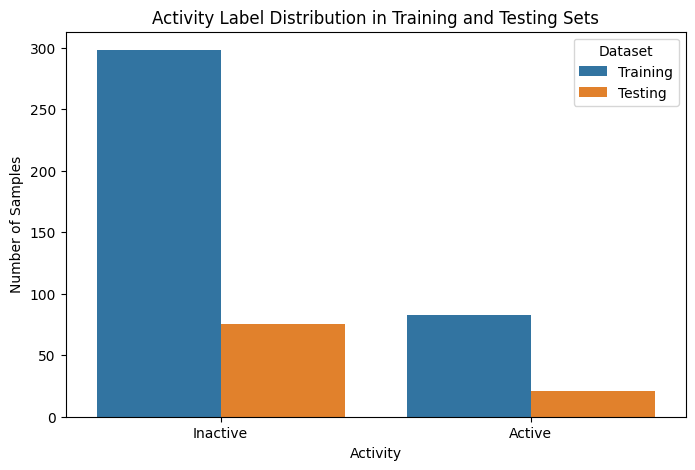

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split


# Count labels in train and test
train_counts = train_df['Activity'].value_counts().sort_index()
test_counts = test_df['Activity'].value_counts().sort_index()


plot_df = pd.DataFrame({
    'Training': train_counts,
    'Testing': test_counts
}).reset_index(names=['Activity_Label'])


plot_df = plot_df.melt(id_vars='Activity_Label', var_name='Dataset', value_name='Count')

# Rename Activity labels for clarity
plot_df['Activity'] = plot_df['Activity_Label'].map({0: 'Inactive', 1: 'Active'})

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x='Activity', y='Count', hue='Dataset', data=plot_df)
plt.title('Activity Label Distribution in Training and Testing Sets')
plt.ylabel('Number of Samples')
plt.xlabel('Activity')
plt.show()

In [61]:
!pip install biopython

import pandas as pd
from Bio.SeqUtils import molecular_weight
from Bio.Seq import Seq

# Define peptide feature calculation functions
def calculate_charge(sequence):
    """Calculate net charge: K, R, H (+), D, E (-)"""
    positive = sequence.count('K') + sequence.count('R') + sequence.count('H')
    negative = sequence.count('D') + sequence.count('E')
    return positive - negative

def calculate_molecular_weight(sequence):
    """Calculate molecular weight of peptide sequence"""
    return molecular_weight(Seq(sequence), seq_type='protein')

def calculate_hydrophobicity(sequence):
    """Calculate hydrophobicity based on Kyte-Doolittle scale residues"""
    hydrophobic_residues = 'AVILMFWP'
    hydrophobic_score = sum([1 for aa in sequence if aa in hydrophobic_residues])
    return hydrophobic_score

def calculate_number_of_cysteines(sequence):
    """Count cysteine residues"""
    return sequence.count('C')

def calculate_number_of_disulfide_bridges(sequence):
    """Estimate disulfide bridges as integer division of cysteines by 2"""
    cysteines = sequence.count('C')
    return cysteines // 2

def calculate_isoelectric_point(sequence):
    """Simplified isoelectric point estimate"""
    pKa_acidic = {'D': 3.9, 'E': 4.25}
    pKa_basic = {'K': 10.5, 'R': 12.5, 'H': 6.0}
    acidic_count = sum([sequence.count(aa) for aa in pKa_acidic])
    basic_count = sum([sequence.count(aa) for aa in pKa_basic])
    if acidic_count + basic_count > 0:
        pI = (sum([pKa_acidic[aa] * sequence.count(aa) for aa in pKa_acidic]) +
              sum([pKa_basic[aa] * sequence.count(aa) for aa in pKa_basic])) / (acidic_count + basic_count)
    else:
        pI = 7.0  # Neutral default if no acidic/basic residues
    return pI

def amino_acid_composition(sequence):
    """Calculate percentage composition of each amino acid"""
    amino_acids = 'ACDEFGHIKLMNPQRSTVWY'
    composition = {aa: sequence.count(aa) for aa in amino_acids}
    total_residues = len(sequence)
    composition_percent = {aa: (count / total_residues) * 100 if total_residues > 0 else 0
                          for aa, count in composition.items()}
    return composition_percent

def secondary_structure_features(sequence):
    """Simplified secondary structure feature counts"""
    helix_aa = 'ALIVMFYW'
    sheet_aa = 'FYW'
    turn_aa = 'GP'
    helix = sum([sequence.count(aa) for aa in helix_aa])
    sheet = sum([sequence.count(aa) for aa in sheet_aa])
    turn = sum([sequence.count(aa) for aa in turn_aa])
    flexibility = helix / len(sequence) if len(sequence) > 0 else 0
    return helix, turn, sheet, flexibility

# Load your train and test datasets (assumed to include 'Sequence' column)
X_train = pd.read_csv('/content/drive/MyDrive/EC/EC imbalance/X_train.csv')
X_test = pd.read_csv('/content/drive/MyDrive/EC/EC imbalance/X_test.csv')

# Define feature engineering function
def apply_feature_engineering(df):
    seq_col = 'Sequence'
    df['Length'] = df[seq_col].apply(len)
    df['Charge'] = df[seq_col].apply(calculate_charge)
    df['Hydrophobicity'] = df[seq_col].apply(calculate_hydrophobicity)
    df['Molecular_Weight'] = df[seq_col].apply(calculate_molecular_weight)
    df['Number_of_Cysteines'] = df[seq_col].apply(calculate_number_of_cysteines)
    df['Number_of_Disulfide_Bridges'] = df[seq_col].apply(calculate_number_of_disulfide_bridges)
    df['Isoelectric_Point'] = df[seq_col].apply(calculate_isoelectric_point)
    df['Amino_Acid_Composition'] = df[seq_col].apply(amino_acid_composition)
    df[['Helix', 'Turn', 'Sheet', 'Flexibility']] = df[seq_col].apply(secondary_structure_features).apply(pd.Series)

    # Expand amino acid composition dict into individual columns
    aa_columns = pd.DataFrame(df['Amino_Acid_Composition'].tolist(), columns=list('ACDEFGHIKLMNPQRSTVWY'))
    df = pd.concat([df.reset_index(drop=True), aa_columns.reset_index(drop=True)], axis=1)
    df = df.drop(columns=['Amino_Acid_Composition'])

    return df

# Apply feature engineering
X_train_fe = apply_feature_engineering(X_train.copy())
X_test_fe = apply_feature_engineering(X_test.copy())

# Save the enhanced feature datasets if needed
X_train_fe.to_csv('/content/drive/MyDrive/EC/EC imbalance/X_train_features.csv', index=False)
X_test_fe.to_csv('/content/drive/MyDrive/EC/EC imbalance/X_test_features.csv', index=False)

# Display first few rows of the enhanced training features
print(X_train_fe.head())
print(X_test_fe.head())


                                   Sequence  Length  Charge  Hydrophobicity  \
0                           KWKLFKKGAVLKVLT      15       5               8   
1             VDKMVPRTFRTVDNLDLPLAEGCPKLGPQ      29       0              14   
2  YRCHTIMNCTRTCPKGLNPGKAIAEIKKMMATYKEKKASV      40       8              14   
3                         EQEELENYIEHVLLHRP      17      -2               6   
4             PNPSTSASPKKSPPPAKDEARTTEREKPQ      29       2              10   

   Molecular_Weight  Number_of_Cysteines  Number_of_Disulfide_Bridges  \
0         1759.2284                    0                            0   
1         3210.7245                    1                            0   
2         4516.4273                    3                            1   
3         2148.3312                    0                            0   
4         3132.3981                    0                            0   

   Isoelectric_Point  Helix  Turn  ...         M         N          P  \
0          10

In [8]:
import pandas as pd

X_train_fe = pd.read_csv('/content/drive/MyDrive/EC/EC imbalance/X_train_features.csv')
y_train = pd.read_csv('/content/drive/MyDrive/EC/EC imbalance/y_train.csv') # Assuming y_train was saved correctly earlier
X_train_final_features = X_train_fe.drop(columns=['Sequence'])

print("X_train_features and y_train saved successfully!")

print("X_train_features and y_train saved successfully!")

X_train_features and y_train saved successfully!
X_train_features and y_train saved successfully!


In [62]:
# Load your training data (example from CSV files)
X_train = pd.read_csv('/content/drive/MyDrive/EC/EC imbalance/X_train_features.csv')
# Load your training data (example from CSV files)
X_train = pd.read_csv('/content/drive/MyDrive/EC/EC imbalance/X_train_features.csv')
y_train = pd.read_csv('/content/drive/MyDrive/EC/EC imbalance/y_train.csv').squeeze()
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (381, 32)
y_train shape: (381,)


Evaluating Random Forest...
Random Forest - Mean F1 Score: 0.8800 (+/- 0.0619)
Random Forest - ROC AUC: 1.0000
Random Forest - PR AUC: 1.0000
Random Forest - Sensitivity: 1.0000
Random Forest - Specificity: 1.0000
Random Forest - MCC: 1.0000
Evaluating Gradient Boosting...
Gradient Boosting - Mean F1 Score: 0.8468 (+/- 0.0439)
Gradient Boosting - ROC AUC: 1.0000
Gradient Boosting - PR AUC: 1.0000
Gradient Boosting - Sensitivity: 1.0000
Gradient Boosting - Specificity: 1.0000
Gradient Boosting - MCC: 1.0000
Evaluating XGBoost...
XGBoost - Mean F1 Score: 0.8455 (+/- 0.0387)
XGBoost - ROC AUC: 1.0000
XGBoost - PR AUC: 1.0000
XGBoost - Sensitivity: 1.0000
XGBoost - Specificity: 1.0000
XGBoost - MCC: 1.0000
Evaluating Decision Tree...
Decision Tree - Mean F1 Score: 0.7873 (+/- 0.0815)
Decision Tree - ROC AUC: 1.0000
Decision Tree - PR AUC: 1.0000
Decision Tree - Sensitivity: 1.0000
Decision Tree - Specificity: 1.0000
Decision Tree - MCC: 1.0000
Evaluating AdaBoost...
AdaBoost - Mean F1 Scor

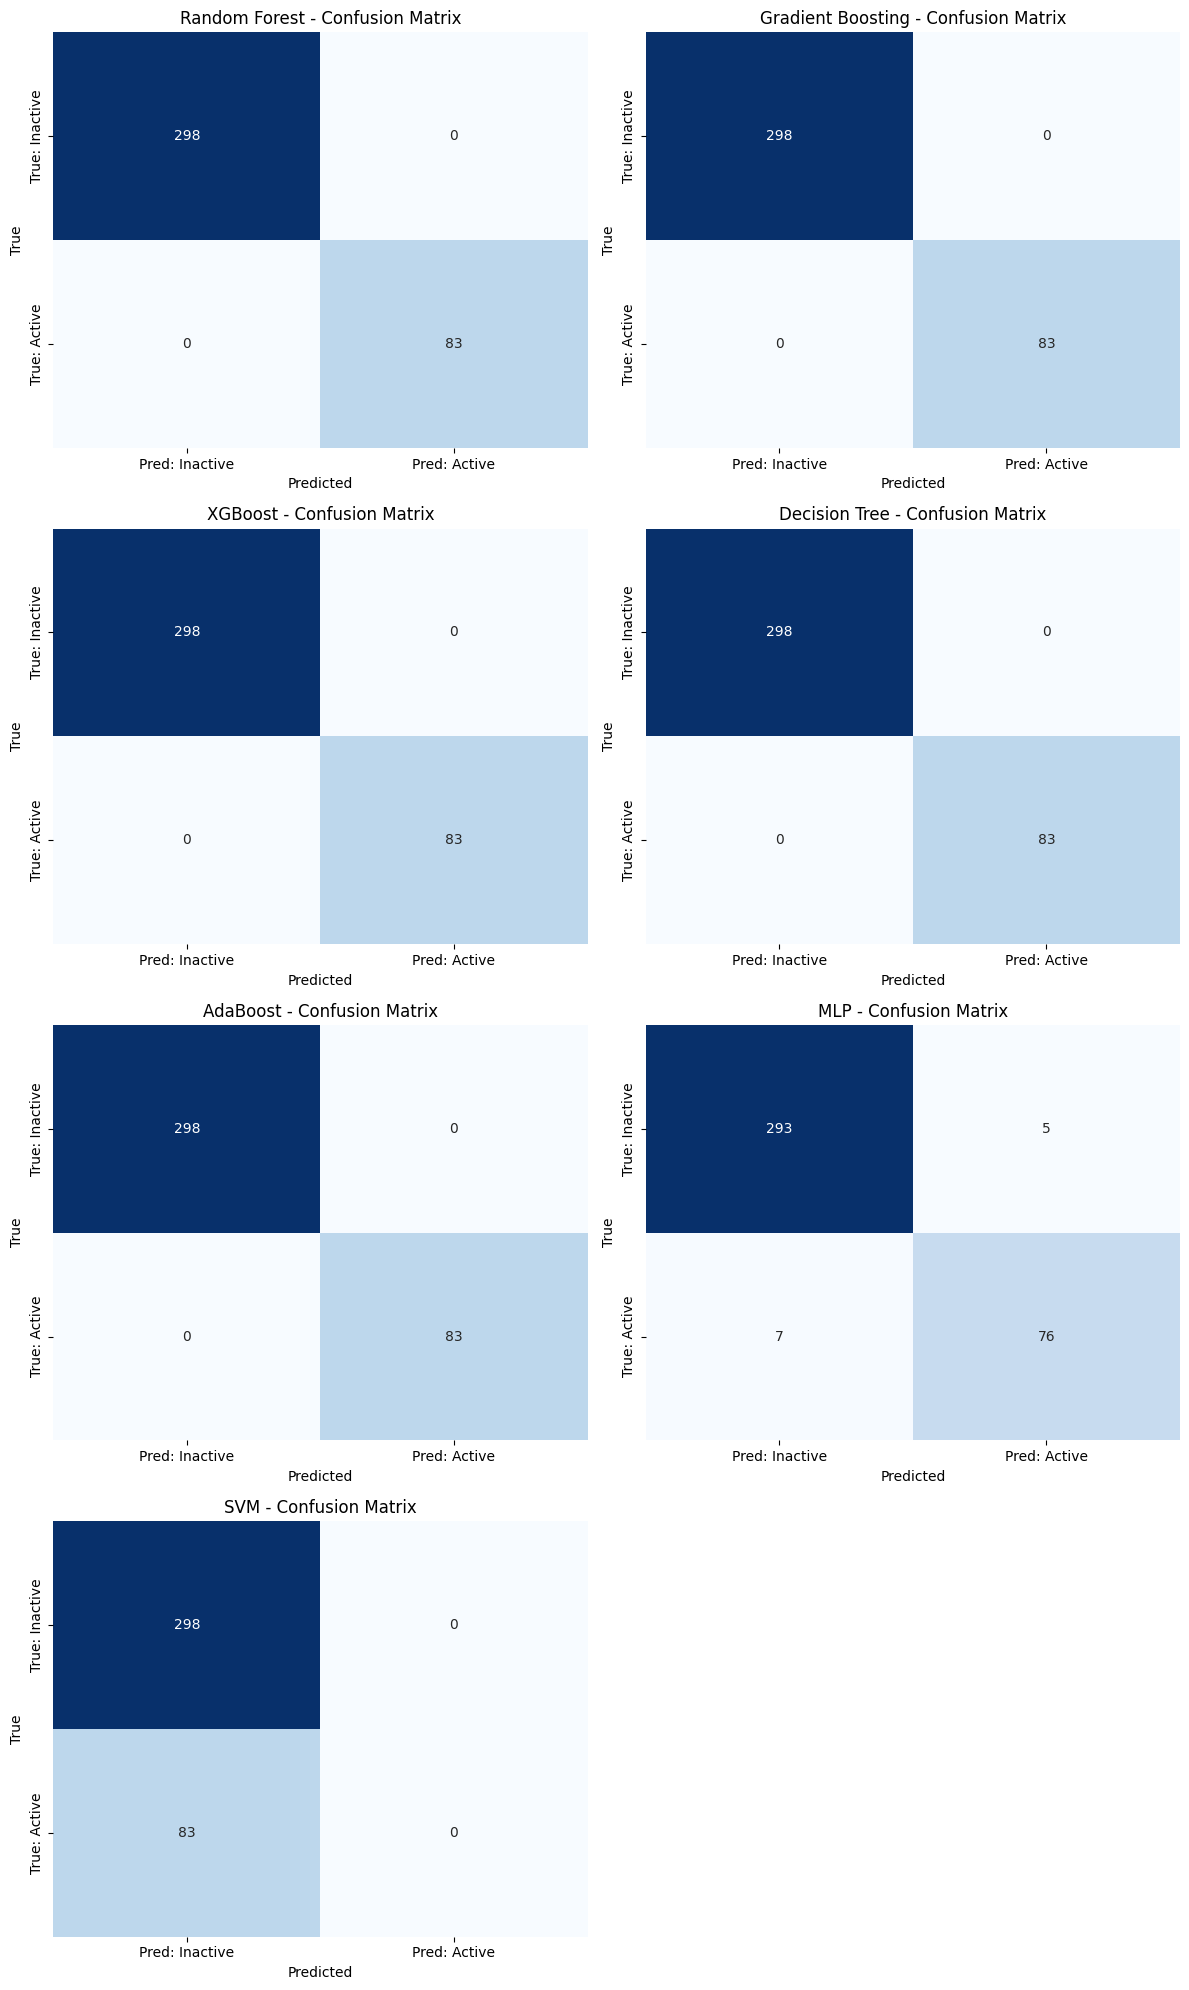


Model Comparison Summary:

F1 Scores:
Random Forest: 0.8800 (+/- 0.0619)
Gradient Boosting: 0.8468 (+/- 0.0439)
XGBoost: 0.8455 (+/- 0.0387)
Decision Tree: 0.7873 (+/- 0.0815)
AdaBoost: 0.8569 (+/- 0.0288)
MLP: 0.8276 (+/- 0.0448)
SVM: 0.0000 (+/- 0.0000)

ROC AUC Scores:
Random Forest: 1.0000
Gradient Boosting: 1.0000
XGBoost: 1.0000
Decision Tree: 1.0000
AdaBoost: 1.0000
MLP: 0.9945
SVM: 0.9485

PR AUC Scores:
Random Forest: 1.0000
Gradient Boosting: 1.0000
XGBoost: 1.0000
Decision Tree: 1.0000
AdaBoost: 1.0000
MLP: 0.9829
SVM: 0.8948

Sensitivity (Recall) Scores:
Random Forest: 1.0000
Gradient Boosting: 1.0000
XGBoost: 1.0000
Decision Tree: 1.0000
AdaBoost: 1.0000
MLP: 0.9157
SVM: 0.0000

Specificity Scores:
Random Forest: 1.0000
Gradient Boosting: 1.0000
XGBoost: 1.0000
Decision Tree: 1.0000
AdaBoost: 1.0000
MLP: 0.9832
SVM: 1.0000

MCC Scores:
Random Forest: 1.0000
Gradient Boosting: 1.0000
XGBoost: 1.0000
Decision Tree: 1.0000
AdaBoost: 1.0000
MLP: 0.9069
SVM: 0.0000


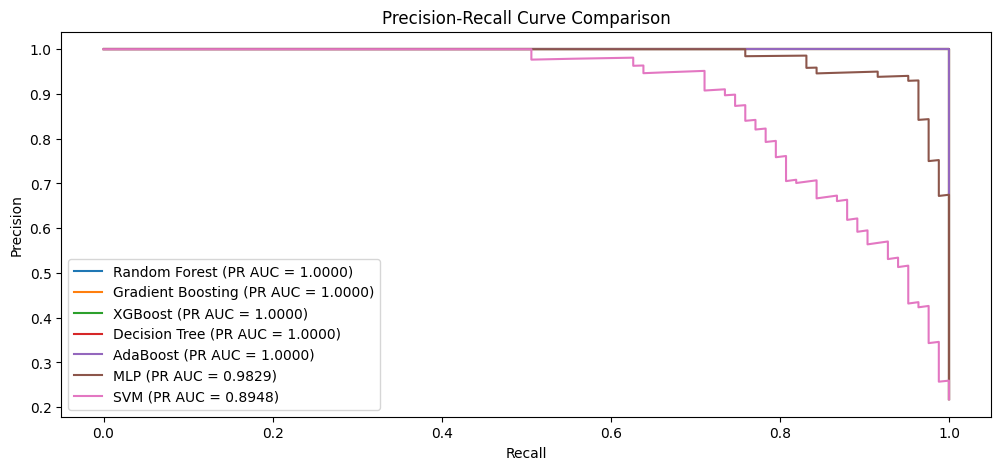

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.metrics import (confusion_matrix, matthews_corrcoef, roc_auc_score,
                             average_precision_score, precision_recall_curve,
                             recall_score, classification_report)
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, \
    AdaBoostClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

# Define models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(eval_metric='logloss', random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42),
    'MLP': MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42),
    'SVM': SVC(probability=True, random_state=42),  # Support Vector Machine
}

# Prepare lists to store results
f1_scores = []
roc_aucs = []
pr_aucs = []
sensitivities = []
specificities = []
mcc_scores = []

X_train = pd.read_csv('/content/drive/MyDrive/EC/EC imbalance/X_train_features.csv')
y_train = pd.read_csv('/content/drive/MyDrive/EC/EC imbalance/y_train.csv').squeeze()

# --- FIX: Drop the 'Sequence' column from X_train before using it in model training/evaluation ---
if 'Sequence' in X_train.columns:
    X_train = X_train.drop(columns=['Sequence'])
# --------------------------------------------------------------------------------------------------

# Number of rows and columns for plotting
n_rows = (len(models) + 1) // 2  # To fit models in a 2-column layout
n_cols = 2

# Create a plot for confusion matrices
plt.figure(figsize=(12, n_rows * 5))  # Adjust height based on number of rows

# Train, evaluate, and collect metrics for each model
for i, (name, model) in enumerate(models.items(), 1):
    print(f"Evaluating {name}...")

    # Cross-validation F1 score
    # The error occurred here because X_train still contained the 'Sequence' column (string type)
    f1_cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1')
    mean_f1 = np.mean(f1_cv_scores)
    std_f1 = np.std(f1_cv_scores)

    # Train the model on the entire training set for later evaluation
    model.fit(X_train, y_train)

    # ROC AUC Score
    y_prob = model.predict_proba(X_train)[:, 1]  # Probability for positive class
    roc_auc = roc_auc_score(y_train, y_prob)

    # PR AUC Score
    pr_auc = average_precision_score(y_train, y_prob)

    # Store results for comparison
    f1_scores.append((name, mean_f1, std_f1))
    roc_aucs.append((name, roc_auc))
    pr_aucs.append((name, pr_auc))

    # Confusion Matrix
    y_pred = model.predict(X_train)
    cm = confusion_matrix(y_train, y_pred)
    tn, fp, fn, tp = cm.ravel()

    # Calculate Sensitivity, Specificity, and MCC
    sensitivity = recall_score(y_train, y_pred)  # True Positive Rate
    specificity = tn / (tn + fp)  # True Negative Rate
    mcc = matthews_corrcoef(y_train, y_pred)

    # Store additional metrics
    sensitivities.append((name, sensitivity))
    specificities.append((name, specificity))
    mcc_scores.append((name, mcc))

    # Display metrics
    print(f"{name} - Mean F1 Score: {mean_f1:.4f} (+/- {std_f1:.4f})")
    print(f"{name} - ROC AUC: {roc_auc:.4f}")
    print(f"{name} - PR AUC: {pr_auc:.4f}")
    print(f"{name} - Sensitivity: {sensitivity:.4f}")
    print(f"{name} - Specificity: {specificity:.4f}")
    print(f"{name} - MCC: {mcc:.4f}")

    # Plot confusion matrix
    plt.subplot(n_rows, n_cols, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Pred: Inactive', 'Pred: Active'],
                yticklabels=['True: Inactive', 'True: Active'])
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel('Predicted')
    plt.ylabel('True')

plt.tight_layout()
plt.show()

# Summary of model comparison
print("\nModel Comparison Summary:")

# F1 Scores
print("\nF1 Scores:")
for model_name, f1, std in f1_scores:
    print(f"{model_name}: {f1:.4f} (+/- {std:.4f})")

# ROC AUC Scores
print("\nROC AUC Scores:")
for model_name, auc in roc_aucs:
    print(f"{model_name}: {auc:.4f}")

# PR AUC Scores
print("\nPR AUC Scores:")
for model_name, auc in pr_aucs:
    print(f"{model_name}: {auc:.4f}")

# Sensitivity
print("\nSensitivity (Recall) Scores:")
for model_name, sensitivity in sensitivities:
    print(f"{model_name}: {sensitivity:.4f}")

# Specificity
print("\nSpecificity Scores:")
for model_name, specificity in specificities:
    print(f"{model_name}: {specificity:.4f}")

# MCC Scores
print("\nMCC Scores:")
for model_name, mcc in mcc_scores:
    print(f"{model_name}: {mcc:.4f}")

# Optional: If you want to visualize PR curves for all models

plt.figure(figsize=(12, 5))
for i, (name, model) in enumerate(models.items(), 1):
    # Calculate Precision-Recall curve
    # Ensure X_train used here also has 'Sequence' dropped
    precision, recall, _ = precision_recall_curve(y_train, model.predict_proba(X_train)[:, 1])
    plt.plot(recall, precision, label=f'{name} (PR AUC = {pr_aucs[i-1][1]:.4f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison')
plt.legend(loc='lower left')
plt.show()

Evaluating and Saving Random Forest...
✅ Saved model: /content/drive/MyDrive/EC/EC imbalance/pretrain_random_forest_model.pkl
Random Forest - Mean CV F1 Score: 0.8800 (+/- 0.0619)
Random Forest - Train ROC AUC: 1.0000
Random Forest - Train PR AUC: 1.0000
Random Forest - Train Sensitivity: 1.0000
Random Forest - Train Specificity: 1.0000
Random Forest - Train MCC: 1.0000


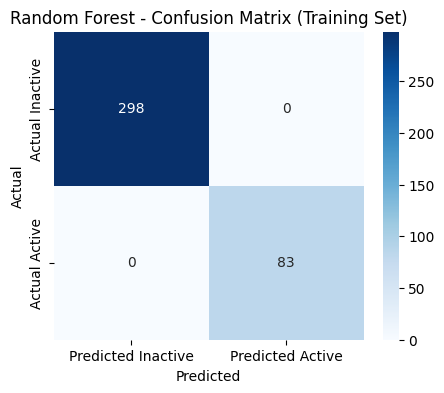

Evaluating and Saving Gradient Boosting...
✅ Saved model: /content/drive/MyDrive/EC/EC imbalance/pretrain_gradient_boosting_model.pkl
Gradient Boosting - Mean CV F1 Score: 0.8468 (+/- 0.0439)
Gradient Boosting - Train ROC AUC: 1.0000
Gradient Boosting - Train PR AUC: 1.0000
Gradient Boosting - Train Sensitivity: 1.0000
Gradient Boosting - Train Specificity: 1.0000
Gradient Boosting - Train MCC: 1.0000


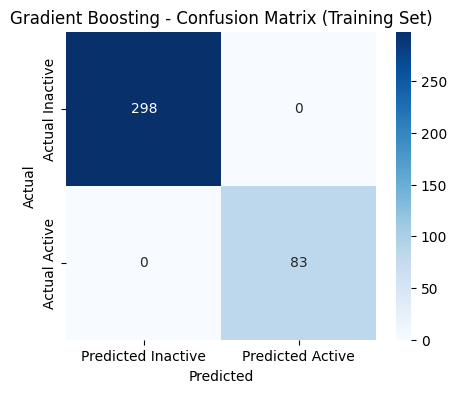

Evaluating and Saving XGBoost...
✅ Saved model: /content/drive/MyDrive/EC/EC imbalance/pretrain_xgboost_model.pkl
XGBoost - Mean CV F1 Score: 0.8455 (+/- 0.0387)
XGBoost - Train ROC AUC: 1.0000
XGBoost - Train PR AUC: 1.0000
XGBoost - Train Sensitivity: 1.0000
XGBoost - Train Specificity: 1.0000
XGBoost - Train MCC: 1.0000


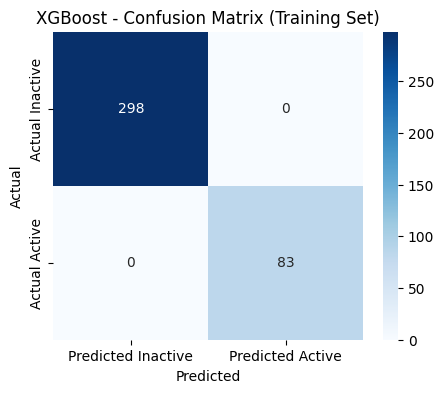

Evaluating and Saving AdaBoost...
✅ Saved model: /content/drive/MyDrive/EC/EC imbalance/pretrain_adaboost_model.pkl
AdaBoost - Mean CV F1 Score: 0.8569 (+/- 0.0288)
AdaBoost - Train ROC AUC: 1.0000
AdaBoost - Train PR AUC: 1.0000
AdaBoost - Train Sensitivity: 1.0000
AdaBoost - Train Specificity: 1.0000
AdaBoost - Train MCC: 1.0000


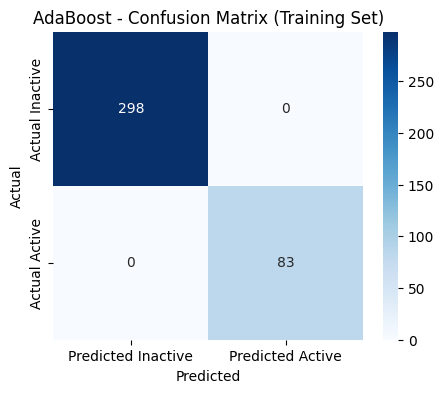

Evaluating and Saving SVM...
✅ Saved model: /content/drive/MyDrive/EC/EC imbalance/pretrain_svm_model.pkl
SVM - Mean CV F1 Score: 0.0000 (+/- 0.0000)
SVM - Train ROC AUC: 0.9485
SVM - Train PR AUC: 0.8948
SVM - Train Sensitivity: 0.0000
SVM - Train Specificity: 1.0000
SVM - Train MCC: 0.0000


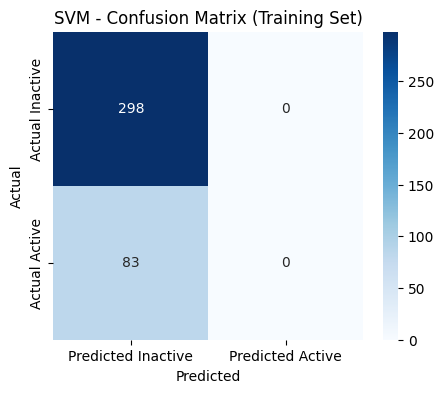

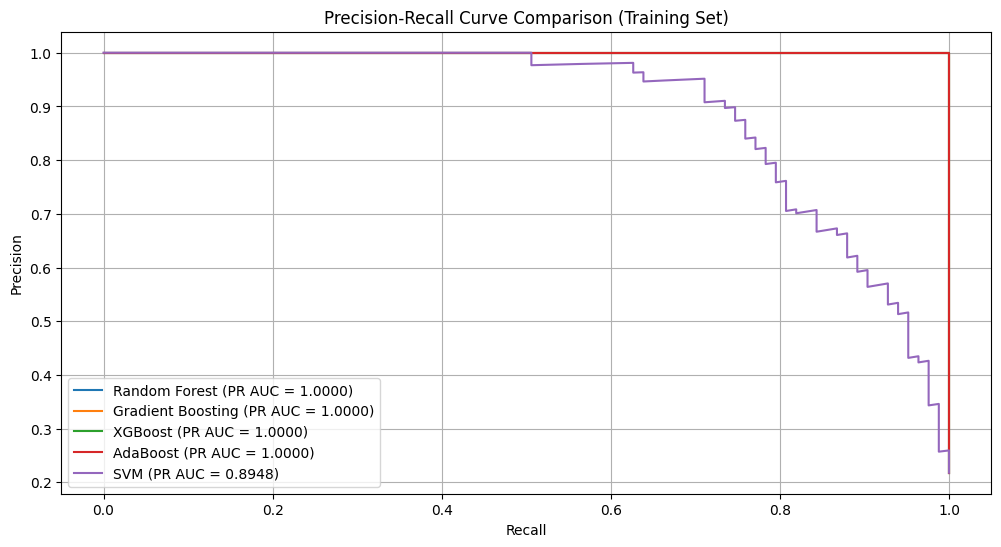

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.metrics import (
    confusion_matrix, matthews_corrcoef, roc_auc_score,
    average_precision_score, precision_recall_curve,
    recall_score, classification_report, f1_score
)
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
import joblib
import os

# Define models dictionary
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(eval_metric='logloss', random_state=42),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(probability=True, random_state=42),
}

# Load data
X_train = pd.read_csv('/content/drive/MyDrive/EC/EC imbalance/X_train_features.csv')
y_train = pd.read_csv('/content/drive/MyDrive/EC/EC imbalance/y_train.csv').squeeze()

if 'Sequence' in X_train.columns:
    X_train = X_train.drop(columns=['Sequence'])

# Prepare lists for metrics
f1_scores = []
roc_aucs = []
pr_aucs = []
sensitivities = []
specificities = []
mcc_scores = []

model_dir = '/content/drive/MyDrive/EC/EC imbalance'
os.makedirs(model_dir, exist_ok=True)

# Train models and evaluate
for i, (name, model) in enumerate(models.items(), 1):
    print(f"Evaluating and Saving {name}...")

    # Cross-validation F1 score
    f1_cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1')
    mean_f1 = np.mean(f1_cv_scores)
    std_f1 = np.std(f1_cv_scores)

    # Train full model
    model.fit(X_train, y_train)

    # Save model
    model_filename = os.path.join(model_dir, f"pretrain_{name.replace(' ', '_').lower()}_model.pkl")
    joblib.dump(model, model_filename)
    print(f"✅ Saved model: {model_filename}")

    # Predict on training data
    y_pred_train = model.predict(X_train)
    y_prob_train = model.predict_proba(X_train)[:, 1]

    # Calculate metrics
    roc_auc_train = roc_auc_score(y_train, y_prob_train)
    pr_auc_train = average_precision_score(y_train, y_prob_train)
    cm_train = confusion_matrix(y_train, y_pred_train)
    tn, fp, fn, tp = cm_train.ravel()
    sensitivity_train = recall_score(y_train, y_pred_train)
    specificity_train = tn / (tn + fp)
    mcc_train = matthews_corrcoef(y_train, y_pred_train)

    # Store metrics
    f1_scores.append((name, mean_f1, std_f1))
    roc_aucs.append((name, roc_auc_train))
    pr_aucs.append((name, pr_auc_train))
    sensitivities.append((name, sensitivity_train))
    specificities.append((name, specificity_train))
    mcc_scores.append((name, mcc_train))

    # Print training metrics
    print(f"{name} - Mean CV F1 Score: {mean_f1:.4f} (+/- {std_f1:.4f})")
    print(f"{name} - Train ROC AUC: {roc_auc_train:.4f}")
    print(f"{name} - Train PR AUC: {pr_auc_train:.4f}")
    print(f"{name} - Train Sensitivity: {sensitivity_train:.4f}")
    print(f"{name} - Train Specificity: {specificity_train:.4f}")
    print(f"{name} - Train MCC: {mcc_train:.4f}")

    # Plot confusion matrix for this model
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicted Inactive', 'Predicted Active'],
                yticklabels=['Actual Inactive', 'Actual Active'])
    plt.title(f'{name} - Confusion Matrix (Training Set)')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot Precision-Recall curves for all models on training data
plt.figure(figsize=(12, 6))
for name, model in models.items():
    y_prob_train = model.predict_proba(X_train)[:, 1]
    precision, recall, _ = precision_recall_curve(y_train, y_prob_train)
    current_pr_auc = [auc for n, auc in pr_aucs if n == name][0]
    plt.plot(recall, precision, label=f'{name} (PR AUC = {current_pr_auc:.4f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison (Training Set)')
plt.legend(loc='lower left')
plt.grid()
plt.show()


Evaluating Random Forest on test set...
Random Forest - Test Accuracy: 0.9375
Random Forest - Test MCC: 0.8107
Random Forest - Test Sensitivity: 0.7619
Random Forest - Test Specificity: 0.9867
Random Forest - Test ROC AUC: 0.9879
Random Forest - Test PR AUC: 0.9590


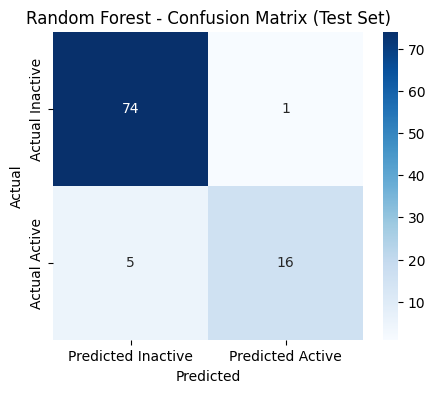

Evaluating Gradient Boosting on test set...
Gradient Boosting - Test Accuracy: 0.9271
Gradient Boosting - Test MCC: 0.7787
Gradient Boosting - Test Sensitivity: 0.7619
Gradient Boosting - Test Specificity: 0.9733
Gradient Boosting - Test ROC AUC: 0.9797
Gradient Boosting - Test PR AUC: 0.9059


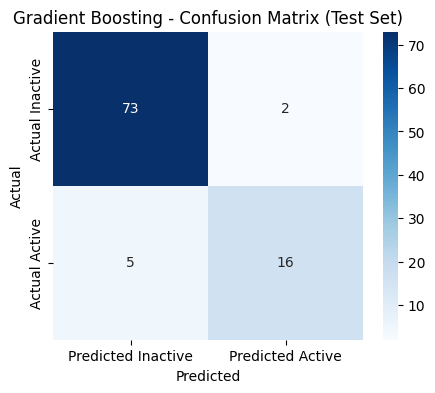

Evaluating XGBoost on test set...
XGBoost - Test Accuracy: 0.9167
XGBoost - Test MCC: 0.7490
XGBoost - Test Sensitivity: 0.7619
XGBoost - Test Specificity: 0.9600
XGBoost - Test ROC AUC: 0.9810
XGBoost - Test PR AUC: 0.9370


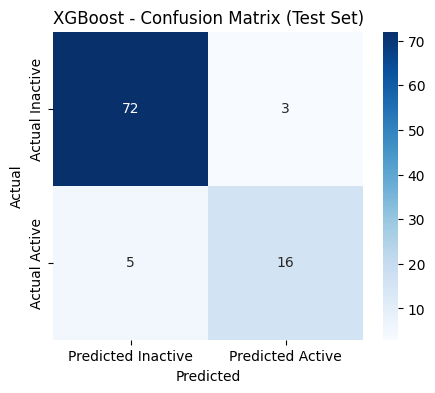

Evaluating AdaBoost on test set...
AdaBoost - Test Accuracy: 0.9375
AdaBoost - Test MCC: 0.8123
AdaBoost - Test Sensitivity: 0.8095
AdaBoost - Test Specificity: 0.9733
AdaBoost - Test ROC AUC: 0.9797
AdaBoost - Test PR AUC: 0.9265


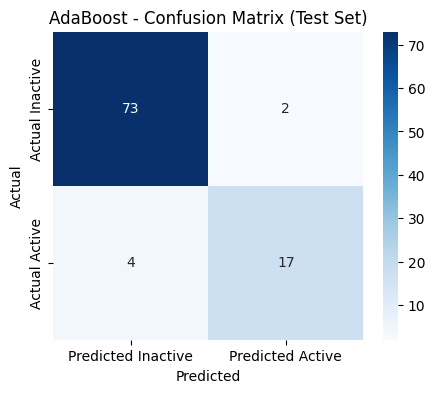

Evaluating SVM on test set...
SVM - Test Accuracy: 0.7812
SVM - Test MCC: 0.0000
SVM - Test Sensitivity: 0.0000
SVM - Test Specificity: 1.0000
SVM - Test ROC AUC: 0.9448
SVM - Test PR AUC: 0.8654


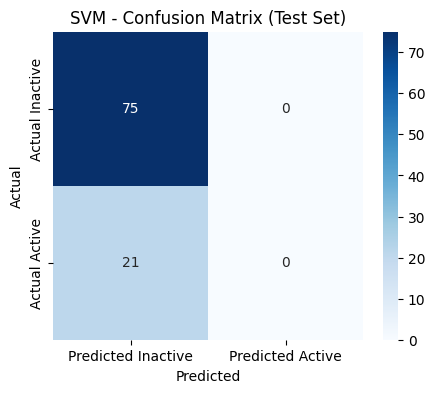

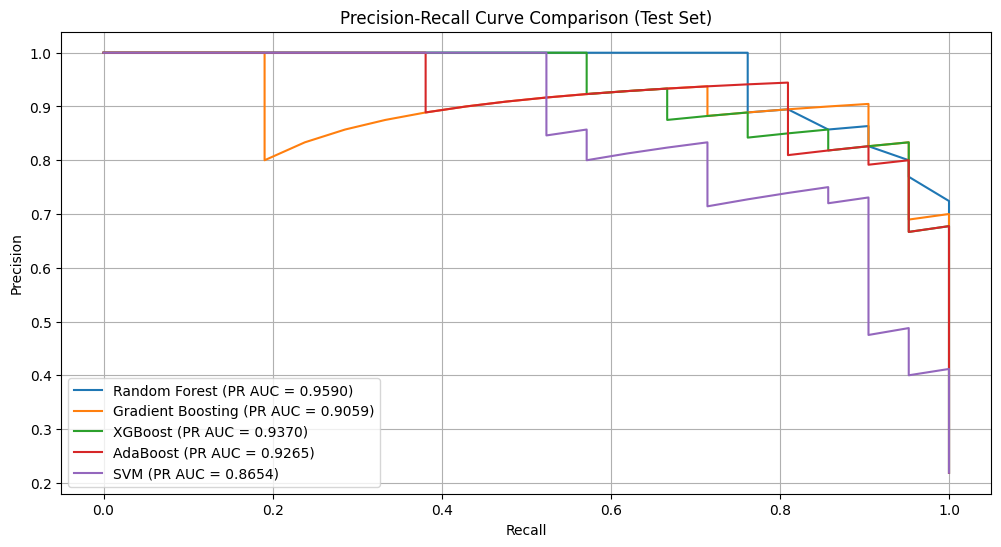

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix, matthews_corrcoef, roc_auc_score,
    average_precision_score, precision_recall_curve,
    recall_score, classification_report, f1_score,
    accuracy_score
)
import joblib # Import joblib to load models
import os

# Define the directory where models were saved
model_dir = '/content/drive/MyDrive/EC/EC imbalance'

# Define the names of the models to load
model_names = [
    'Random Forest',
    'Gradient Boosting',
    'XGBoost',
    'AdaBoost',
    'SVM',
]

# Load the saved models into a dictionary
# Use a dictionary comprehension for a cleaner way to load models
loaded_models = {
    name: joblib.load(os.path.join(model_dir, f"pretrain_{name.replace(' ', '_').lower()}_model.pkl"))
    for name in model_names
}

# Load test data
X_test = pd.read_csv('/content/drive/MyDrive/EC/EC imbalance/X_test_features.csv')
y_test = pd.read_csv('/content/drive/MyDrive/EC/EC imbalance/y_test.csv').squeeze()

if 'Sequence' in X_test.columns:
    X_test = X_test.drop(columns=['Sequence'])

# Prepare lists for test metrics
test_accuracies = []
test_mccs = []
test_sensitivities = []
test_specificities = []
test_roc_aucs = []
test_pr_aucs = []

# Evaluate loaded models on test set
# Use the loaded_models dictionary here instead of the re-initialized 'models'
for name, model in loaded_models.items():
    print(f"Evaluating {name} on test set...")

    # Check if the model supports predict_proba before calling it (e.g., for some SVC kernels)
    # All models defined in the previous cell should support it, but it's good practice.
    if hasattr(model, 'predict_proba'):
        y_prob_test = model.predict_proba(X_test)[:, 1]
        roc_auc_test = roc_auc_score(y_test, y_prob_test)
        pr_auc_test = average_precision_score(y_test, y_prob_test)
    else:
        # Handle models that don't have predict_proba if necessary
        # For the defined models, this block is not strictly needed,
        # but included for robustness.
        print(f"Model {name} does not support predict_proba. Skipping ROC/PR AUC.")
        y_prob_test = None
        roc_auc_test = np.nan
        pr_auc_test = np.nan


    y_pred_test = model.predict(X_test)


    acc_test = accuracy_score(y_test, y_pred_test)
    mcc_test = matthews_corrcoef(y_test, y_pred_test)
    cm_test = confusion_matrix(y_test, y_pred_test)
    tn, fp, fn, tp = cm_test.ravel()
    sensitivity_test = recall_score(y_test, y_pred_test)
    # Handle potential division by zero if tn+fp is 0
    specificity_test = tn / (tn + fp) if (tn + fp) > 0 else np.nan


    test_accuracies.append((name, acc_test))
    test_mccs.append((name, mcc_test))
    test_sensitivities.append((name, sensitivity_test))
    test_specificities.append((name, specificity_test))
    test_roc_aucs.append((name, roc_auc_test))
    test_pr_aucs.append((name, pr_auc_test))

    print(f"{name} - Test Accuracy: {acc_test:.4f}")
    print(f"{name} - Test MCC: {mcc_test:.4f}")
    print(f"{name} - Test Sensitivity: {sensitivity_test:.4f}")
    print(f"{name} - Test Specificity: {specificity_test:.4f}")
    print(f"{name} - Test ROC AUC: {roc_auc_test:.4f}")
    print(f"{name} - Test PR AUC: {pr_auc_test:.4f}")

    # Plot confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicted Inactive', 'Predicted Active'],
                yticklabels=['Actual Inactive', 'Actual Active'])
    plt.title(f'{name} - Confusion Matrix (Test Set)')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot Precision-Recall curve comparison on test set
plt.figure(figsize=(12, 6))
# Use the loaded_models dictionary here
for name, model in loaded_models.items():
    # Ensure the model supports predict_proba before plotting the PR curve
    if hasattr(model, 'predict_proba'):
        y_prob_test = model.predict_proba(X_test)[:, 1]
        precision, recall, _ = precision_recall_curve(y_test, y_prob_test)
        # Find the corresponding PR AUC from the list
        current_pr_auc = next((auc for n, auc in test_pr_aucs if n == name), np.nan)
        plt.plot(recall, precision, label=f'{name} (PR AUC = {current_pr_auc:.4f})')
    else:
        print(f"Skipping PR curve for {name} as it does not support predict_proba.")


plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison (Test Set)')
plt.legend(loc='lower left')
plt.grid()
plt.show()

In [46]:
import joblib

# Sort models by PR AUC descending
sorted_models = sorted(test_pr_aucs, key=lambda x: x[1], reverse=True)

# Get top 3 model names
top3_names = [name for name, pr_auc in sorted_models[:3]]
print("Top 3 models by PR AUC:", top3_names)

# Save top 3 models
save_dir = '/content/drive/MyDrive/EC/EC imbalance/top3_models'
os.makedirs(save_dir, exist_ok=True)

for name in top3_names:
    model = models[name]
    filename = f"{save_dir}/{name.replace(' ', '_').lower()}_model.pkl"
    joblib.dump(model, filename)
    print(f"Saved {name} model to {filename}")


Top 3 models by PR AUC: ['Random Forest', 'XGBoost', 'AdaBoost']
Saved Random Forest model to /content/drive/MyDrive/EC/EC imbalance/top3_models/random_forest_model.pkl
Saved XGBoost model to /content/drive/MyDrive/EC/EC imbalance/top3_models/xgboost_model.pkl
Saved AdaBoost model to /content/drive/MyDrive/EC/EC imbalance/top3_models/adaboost_model.pkl


In [53]:
!pip install lime

In [54]:
# Load training data for LIME explainer background
X_train = pd.read_csv('/content/drive/MyDrive/EC/EC imbalance/X_train_features.csv')
if 'Sequence' in X_train.columns:
    X_train_numeric = X_train.drop(columns=['Sequence'])
else:
    X_train_numeric = X_train.copy()


In [55]:
explainer = LimeTabularExplainer(
    training_data=X_train_numeric.values,
    feature_names=X_train_numeric.columns.tolist(),
    class_names=['Inactive', 'Active'],
    mode='classification'
)



Explaining model: Adaboost
Explaining test sample index: 0 predicted Active with probability 0.5644
LIME explanation for features contributing to prediction:
Charge > 5.00: 0.0480
D <= 0.00: 0.0418
K > 13.33: 0.0286
E <= 0.00: 0.0224
Q <= 0.00: 0.0194
Flexibility > 0.45: 0.0146
4.00 < I <= 7.69: 0.0144
W > 2.70: 0.0128
Y <= 0.00: 0.0112
0.00 < G <= 5.88: -0.0105


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


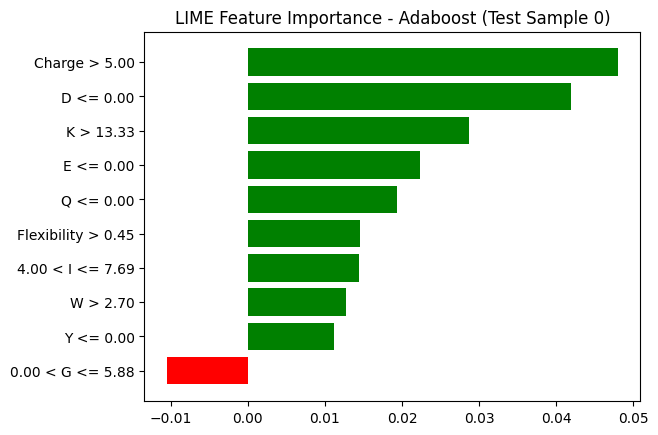


Explaining model: Random Forest
Explaining test sample index: 0 predicted Active with probability 0.7900
LIME explanation for features contributing to prediction:
Charge > 5.00: 0.1520
K > 13.33: 0.1105
Isoelectric_Point > 10.35: 0.1034
D <= 0.00: 0.0504
5.88 < S <= 10.26: -0.0259
W > 2.70: 0.0254
Q <= 0.00: 0.0163
Flexibility > 0.45: 0.0155
E <= 0.00: 0.0133
17.00 < Length <= 26.00: 0.0113


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


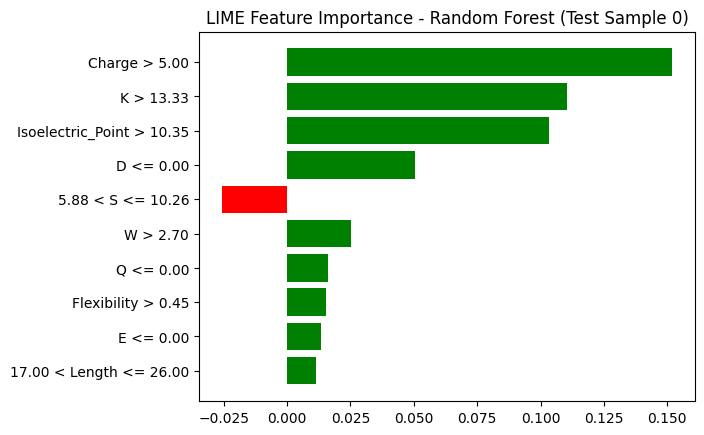


Explaining model: Xgboost
Explaining test sample index: 0 predicted Active with probability 0.7870
LIME explanation for features contributing to prediction:
Charge > 5.00: 0.1576
Isoelectric_Point > 10.35: 0.0546
D <= 0.00: 0.0503
Q <= 0.00: 0.0490
Flexibility > 0.45: 0.0454
5.88 < S <= 10.26: -0.0400
K > 13.33: 0.0304
E <= 0.00: 0.0258
H <= 0.00: -0.0200
W > 2.70: 0.0145


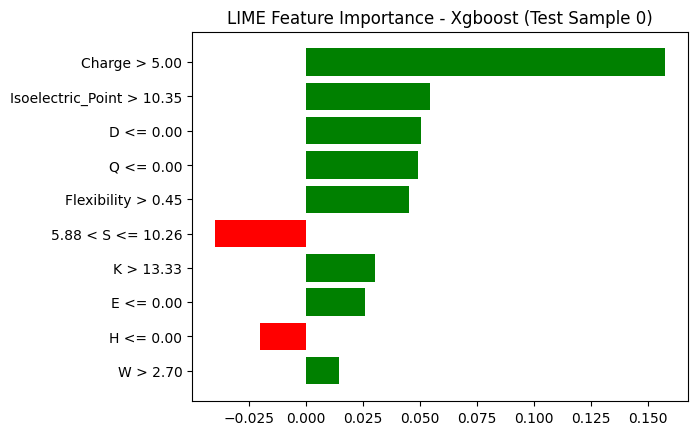

In [56]:
for model_name, model in models.items():
    print(f"\nExplaining model: {model_name}")

    # Predict probabilities on test set
    probs = model.predict_proba(X_test_numeric)
    predicted_classes = np.argmax(probs, axis=1)

    # Find indices predicted as Active (class 1)
    active_indexes = np.where(predicted_classes == 1)[0]

    if len(active_indexes) == 0:
        print(f"No test samples predicted as Active by {model_name}.")
        continue

    # Pick first active sample index
    idx = active_indexes[0]
    print(f"Explaining test sample index: {idx} predicted Active with probability {probs[idx][1]:.4f}")

    # Get feature vector of that sample
    instance = X_test_numeric.iloc[idx].values

    # Generate LIME explanation
    exp = explainer.explain_instance(
        data_row=instance,
        predict_fn=model.predict_proba,
        num_features=10
    )

    # Print feature contributions
    print("LIME explanation for features contributing to prediction:")
    for feature, weight in exp.as_list():
        print(f"{feature}: {weight:.4f}")

    # Plot LIME explanation
    exp.as_pyplot_figure()
    plt.title(f"LIME Feature Importance - {model_name} (Test Sample {idx})")
    plt.show()
